# CharXiv Dataset Explorer

This notebook allows you to explore any entry in the CharXiv dataset by simply changing the entry ID in the configuration cell below.

## Instructions:
1. Run the setup cells first
2. Modify the **ENTRY_ID**, **MODE**, and **SPLIT** in the configuration cell
3. Run the remaining cells to see the prompt and image


## Setup and Imports


In [10]:
import os
import json
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

# Add src directory to path to import utilities
sys.path.append('/n/home08/atong/projects/CharXiv/src')
from descriptive_utils import build_descriptive_quries
from reasoning_utils import build_reasoning_queries

print("✅ Setup complete!")


✅ Setup complete!


## Configuration - Modify This Cell to Change Entry


In [11]:
# ========================================
# MODIFY THESE PARAMETERS TO EXPLORE DIFFERENT ENTRIES
# ========================================

ENTRY_ID = "7_0"           # For descriptive: "0_0", "12_2", etc. For reasoning: "0", "12", etc.
MODE = "descriptive"       # "descriptive" or "reasoning"
SPLIT = "val"              # "val" or "test"

# Paths (modify if needed)
DATA_DIR = "/n/home08/atong/projects/CharXiv/data"
IMAGE_DIR = "/n/netscratch/ydu_lab/Lab/alex/CharXiv/images"

print(f"🔍 Exploring Entry: {ENTRY_ID}")
print(f"📊 Mode: {MODE}")
print(f"📂 Split: {SPLIT}")


🔍 Exploring Entry: 7_0
📊 Mode: descriptive
📂 Split: val


## Data Extraction Function


In [12]:
def get_queries(mode, split, data_dir, image_dir):
    input_file = os.path.join(data_dir, f"{mode}_{split}.json")
    print(f"Reading {input_file}...")
    with open(input_file) as f:
        data = json.load(f)

    if mode == 'descriptive':
        from descriptive_utils import build_descriptive_quries
        queries = build_descriptive_quries(data, image_dir)
    elif mode == 'reasoning':
        from reasoning_utils import build_reasoning_queries
        queries = build_reasoning_queries(data, image_dir)
    else: 
        raise ValueError("Mode not supported")
    
    return data,queries
    

In [13]:
data,queries = get_queries(MODE, SPLIT, DATA_DIR, IMAGE_DIR)

Reading /n/home08/atong/projects/CharXiv/data/descriptive_val.json...


In [14]:
import textwrap

def print_entry_data(entry_id):
    problem = entry_id.split("_")[0]
    idx = int(entry_id.split("_")[1])
    answer = data[problem]['answers'][idx]
    entry_data = queries[entry_id]
    # print the question
    print(f"Figure ID: {entry_data['figure_id']}")
    print(f"Question ID: {entry_data['qid']}")
    print(f"Correct Answer: {answer}")
    print(textwrap.fill(entry_data['question'], width=100))
    # print the image
    image_path = entry_data['figure_path']
    print(image_path)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.show()
    
    

In [15]:
gen = json.load(open("/n/home08/atong/projects/CharXiv/results/gen-gemma3-4b-it-descriptive_val.json"))
gen2 = json.load(open("/n/home08/atong/projects/CharXiv/results/gen-gemma3-4b-it-descriptive_val_parse.json"))

Response: Not Applicable
Figure ID: 107
Question ID: 14
Correct Answer: 0.10
For the current plot, what is the difference between the maximum and minimum values of the tick
labels on the continuous legend (i.e., colorbar)?     * You should remove the percentage sign (if
any) in your answer.     * If the plot does not have an explicit colorbar-based continuous legend or
the legend is not considered relevant to this subplot, answer "Not Applicable".
/n/netscratch/ydu_lab/Lab/alex/CharXiv/images/107.jpg


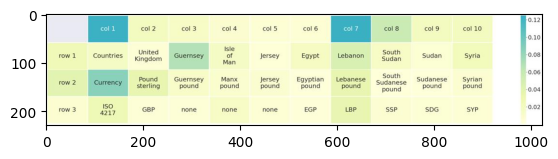

In [36]:
# print_entry_data("81_1")
id = "107_1" # 153_1, 
# print('Response:', textwrap.fill(gen[id]['response'], width=100))
print('Response:', textwrap.fill(gen2[id]['response'], width=90))

print_entry_data(id)

In [35]:
# gen_lis1 = json.load(open("/n/home08/atong/projects/CharXiv/results/gen-gemma3-4b-it-descriptive_val.json"))
# scores_lis1 = json.load(open("/n/home08/atong/projects/CharXiv/results/scores-gemma3-4b-it-descriptive_val.json"))
# scores_lis2 = json.load(open("/n/home08/atong/projects/CharXiv/results/scores-gemma3-27b-it-descriptive_val.json"))
gen_lis1 = json.load(open("/n/home08/atong/projects/CharXiv/results/gen-gemma3-4b-it-descriptive_val.json"))
scores_lis1 = json.load(open("/n/home08/atong/projects/CharXiv/results/scores-gemma3-4b-it-descriptive_val.json"))
scores_lis2 = json.load(open("/n/home08/atong/projects/CharXiv/results/scores-gemma3-4b-it-descriptive_val_parse.json"))
for id in gen_lis1.keys():
    if gen_lis1[id]['qid'] == 14:
        if scores_lis1[id]['score'] == 0 and scores_lis2[id]['score'] == 0:
            print(id)
            
        


7_3
87_3
107_1
135_3
167_3
180_3
257_3
311_3
330_3
333_1
336_0
341_3
346_3
399_0
402_3
406_3
407_1
445_1
450_3
458_3
471_3
474_3
484_3
487_3
496_3
513_3
515_3
531_3
565_3
580_3
593_1
631_3
636_3
642_3
655_3
690_1
777_3
787_3
805_0
888_3
893_3
900_3
908_0
913_0
917_3
934_3
936_3
946_2
949_3
991_2
1054_3
1060_3
1071_3
1130_3
1146_3
1147_3
1164_3
1211_3
1224_3
1305_2
1312_3
1345_3
1351_0
1402_3
1419_3
1439_3
1462_3
1472_1
1489_1
1494_3
1544_3
1563_3
1569_3
1570_1
1580_3
1582_3
1583_1
1611_3
1613_3
1627_1
1661_3
1696_3
1702_3
1705_3
1726_3
1736_3
1773_2
1793_3
1827_3
1837_3
1860_2
1863_3
1958_3
1968_0
1974_3
2005_1
2071_3
2090_3
2112_1
2114_3
2129_3
2130_3
2149_3
2199_3
2223_3
2242_3
2263_1
2288_3
2291_3
2342_3
2347_1
2378_3
2379_3
2390_3
2391_3
2394_3
2399_3


In [ ]:
gen_lis1 = json.load(open("/n/home08/atong/projects/CharXiv/results/gen-gemma3-4b-it-descriptive_val.json"))
gen_lis2 = json.load(open("/n/home08/atong/projects/CharXiv/results/gen-gemma3-4b-it-descriptive_val_parse.json"))
scores_lis1 = json.load(open("/n/home08/atong/projects/CharXiv/results/scores-gemma3-4b-it-descriptive_val.json"))
scores_lis2 = json.load(open("/n/home08/atong/projects/CharXiv/results/scores-gemma3-4b-it-descriptive_val_parse.json"))

# list of qid from 1 to 17, then add to each qid the number of the qid
qid_lis = {}
for i in range(1, 18):
    qid_lis[i] = 0
for id in scores_lis1.keys():
    if scores_lis1[id]['extracted_answer'] == "":
        qid_lis[gen_lis1[id]['qid']] += 1
        
qid_lis2 = {}
for i in range(1, 18):
    qid_lis2[i] = 0
for id in scores_lis2.keys():
    if scores_lis2[id]['extracted_answer'] == "":
        qid_lis2[gen_lis2[id]['qid']] += 1
        

In [7]:
print(qid_lis)
print(qid_lis2)

{1: 16, 2: 12, 3: 12, 4: 2, 5: 2, 6: 3, 7: 0, 8: 4, 9: 6, 10: 2, 11: 2, 12: 5, 13: 47, 14: 1, 15: 0, 16: 0, 17: 0}
{1: 8, 2: 10, 3: 2, 4: 0, 5: 1, 6: 3, 7: 0, 8: 15, 9: 18, 10: 3, 11: 9, 12: 15, 13: 37, 14: 34, 15: 16, 16: 0, 17: 0}
